In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs

    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':12})
rc('text', usetex=True)
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [4]:
## Load the temperatures and other parameters #

In [5]:
foldername = '../../MFUs/Runs_15-09-20_EasyPhase_L8/'
filenamelist = ['KEasyPhase_L8_it0_nsm1048576_nips2_folder/backup']
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)

In [6]:
foldername = '../../MFUs/Runs_04-09-20_EasyPhase_L8/'
filenamelist = ['KEasyPhase_L8_it0_nsm524288_folder/backup']
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots2, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)

In [7]:
# Create a folder to save the pictures
foldername = '../../MFUs/OverviewEasyPhase/'
#foldername = '../Analysis_PSI/Runs_12-11-19_ssfMagnField/'
results_foldername = 'Results_08-10-20_Mash_15-09/'
os.makedirs('./' + foldername + results_foldername, exist_ok = True)

filenamelist= ['../../MFUs/Runs_15-09-20_EasyPhase_L4/Results_08-10-20_nsms524288x4_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L4/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L6/Results_27-09-20_nsms1048576_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L6/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L8/Results_27-09-20_nsms1048576twice_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L8/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L10/Results_08-10-20_nsms524288x4_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L10/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L12/Results_Test-10-20_nsms524288x4_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L12/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L14/Results_08-10-20_nsms524288_nips2/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L16/Results_08-09-20/'
]
n = len(filenamelist)

In [30]:
L = [4,6,8,10,12,14,16]
S = []
Smin = []
Smax =[]
C = []
ErrC = []

for i, filename in enumerate(filenamelist):
    S.append(np.loadtxt(filename +"/AvgS.txt" ))
    Smin.append(np.loadtxt(filename +"/AvgSmin.txt" ))
    Smax.append(np.loadtxt(filename +"/AvgSmax.txt" ))
    C.append(np.loadtxt(filename +"/AvgC.txt" ))
    ErrC.append(np.loadtxt(filename +"/ErrC.txt" ))

Text(0, 0.5, '$1/c$')

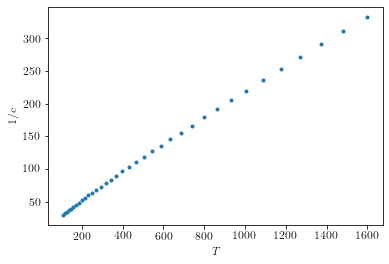

In [50]:
tvals = np.array(temperatures[0][180:216])
plt.figure()
plt.plot(tvals**2, 1/C[6][180:216],'.')

plt.xlabel(r'$T^2$')
plt.ylabel(r'$1/c$')

In [14]:
ErrC


[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.51566272e-09, 1.35413945e-07, 7.10397548e-07,
        9.90460137e-07, 1.08259775e-06, 1.66099597e-06, 1.98247646e-06,
        1.39250402e-06, 2.45811046e-06, 2.26073515e-06, 3.00031012e-06,
        3.85962962e-06, 4.65542730e-06, 6.04284935e-06, 7.07734322e-06,
        6.61596955e-06, 7.41706505e-06, 1.01790294e-05, 9.06156601e-06,
        1.56419054e-05, 1.74861761e-05, 2.05450077e-05, 2.35653532e-05,
        2.87992421e-05, 3.14914579e-05, 3.50067354e-05, 4.01318705e-05,
        4.79109350e-05, 5.98436037e-05, 6.32454110e-05, 6.55202218e-05,
        7.64118950e-05, 9.07864342e-05, 9.47844280e-05, 8.75674761e-05,
        9.37574205e-05, 9.25866048e-05, 8.87829405e-05, 8.78115478e-05,
        8.64818128e-05, 7.49071236e-05, 6.33718628e-05, 5.87903790e-05,
        5.92726791e-05, 5.11284472e-05, 4.21026475e-05, 6.04040885e-05,
        7.49028808e-05, 8.49024998e-05, 9.23351222e-05, 9.613505

In [13]:
Smax[1]-Smin[1]

array([6.67042636e-04, 6.67040596e-04, 6.67035826e-04, 6.67029885e-04,
       6.67021652e-04, 6.67006359e-04, 6.66977501e-04, 6.66939674e-04,
       6.66888562e-04, 6.66823034e-04, 6.66751967e-04, 6.66669480e-04,
       6.66574633e-04, 6.66467572e-04, 6.66344927e-04, 6.66187860e-04,
       6.65989332e-04, 6.65808425e-04, 6.65604266e-04, 6.65308188e-04,
       6.64992262e-04, 6.64617590e-04, 6.64105821e-04, 6.63507022e-04,
       6.62825114e-04, 6.62005573e-04, 6.61032120e-04, 6.59902172e-04,
       6.58544772e-04, 6.56907665e-04, 6.54969906e-04, 6.52668126e-04,
       6.49907725e-04, 6.46630721e-04, 6.42753558e-04, 6.38227311e-04,
       6.33027602e-04, 6.26946899e-04, 6.20036478e-04, 6.12362930e-04,
       6.03996454e-04, 5.95650107e-04, 5.87609589e-04, 5.80375193e-04,
       5.74454641e-04, 5.70132916e-04, 5.66987635e-04, 5.63335736e-04,
       5.57679004e-04, 5.49654423e-04, 5.39540619e-04, 5.27564878e-04,
       5.14792158e-04, 5.01845236e-04, 4.89283127e-04, 4.77831688e-04,
      

In [ ]:
C[0].shape

In [ ]:
ErrC[0].shape

In [ ]:
margin = [0.12, 0.2, 0.02, 0.02]
figsize = (6,4)
markersize = 3
hid = 0
plt.figure(figsize=figsize,dpi=300)
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0
    tidmax = len(temperatures_plots[0])-1
    plt.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],'.', markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    plt.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
plt.xlabel(r'$T$')
plt.ylabel(r'$c$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.legend(loc= 'best', ncol = 1, framealpha=0.5)
plt.savefig('./' + foldername  + results_foldername+ '/SpecificHeatPerSite_VariousSizes.png')


plt.figure(figsize=figsize,dpi=300)
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
for i in range(n):
    temp = temperatures_plots2[0]
    tidmin = 0
    tidmax = len(temperatures_plots2[0])-1
    plt.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax]/temp[tidmin:tidmax],
                 '.', markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    plt.fill_between(temp[tidmin:tidmax],
                     (C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax])/temp[tidmin:tidmax],
                     (C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax])/temp[tidmin:tidmax],
                     alpha=0.2)
plt.xlabel(r'$T$')
plt.ylabel(r'$c/T$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.legend(loc= 'best', ncol = 1, framealpha=0.5)
plt.savefig('./' + foldername  + results_foldername+ '/CPerSiteoverT_VariousSizes.png')

plt.figure(figsize=figsize,dpi=300)
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])

for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0
    tidmax = len(temperatures_plots[0])-1
    plt.semilogx(temp[tidmin:tidmax],
                 S[i][tidmin:tidmax],
                 '.', markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    plt.fill_between(temp[tidmin:tidmax],
                     Smin[i][tidmin:tidmax],
                     Smax[i][tidmin:tidmax],
                     alpha=0.2)

plt.plot([temp[tidmin],temp[tidmax]], [0.262, 0.262])
plt.xlabel(r'$T$')
plt.ylabel(r'$S$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.legend(loc= 'best', ncol = 1, framealpha=0.5)
plt.savefig('./' + foldername  + results_foldername+ '/Entropy_VariousSizes.png')

In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
plt.plot([0, 0.51],[0.10769, 0.10769])
for i in range(n):
    plt.errorbar(1/(3*L[i]),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
plt.xlabel(r'$1/L$')
plt.xlim([0,0.1])
plt.ylabel(r'$S_{g.s.}$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes.png')

In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
#plt.plot([0, 0.51],[0.10769, 0.10769])
for i in range(n):
    plt.errorbar(3*L[i],S[i][0]-0.10769, yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
plt.xlabel(r'$L$')
#plt.xlim([0,0.1])
plt.ylabel(r'$S_{g.s.}$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes_Error.png')

In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])

sizes = np.array([1/(3*(L[i])) for i in range(n)])
values = np.array([S[i][0] for i in range(n)])
for i in range(n):
    plt.errorbar(1/(3*L[i]),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')

             
p, V = np.polyfit(sizes, values, 1, full = False, cov = True)
x = np.linspace(0,0.1)
plt.errorbar(0, p[1], yerr =[np.sqrt(V[1,1])])
plt.plot(x, p[0]*x + p[1])
plt.xlabel(r'$1/L$')
plt.plot([0, 0.008],[0.10769, 0.10769])
plt.ylabel(r'$S_{g.s.}$')
#plt.xlim([-0.0001,None])
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes_N.png')

In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])

sizes = np.array([1/(9*(L[i]**2)) for i in range(n)])
values = np.array([S[i][0] for i in range(n)])
for i in range(n):
    plt.errorbar(1/(9*L[i]**2),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')

             
plt.xlabel(r'$1/N$')
plt.plot([0, 0.008],[0.10769, 0.10769])
plt.ylabel(r'$S_{g.s.}$')
#plt.xlim([-0.0001,None])
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes_N.png')